brest cancer detection using machine learning

In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import xgboost
from xgboost import XGBClassifier+++

In [2]:
names = ["id", "clump_thickness", "uniform_cell_size","uniform_cell-shape","marginal-adhession", "single_epithilial_size","bare_nuclei","bland_chromatin","normal_nucloeli","mitosis","class"]
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df = pd.read_csv(url, names = names)

In [3]:
df.head(5)

,id,clump_thickness,uniform_cell_size,uniform_cell-shape,marginal-adhession,single_epithilial_size,bare_nuclei,bland_chromatin,normal_nucloeli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.replace("?", -99999, inplace = True)
df

,id,clump_thickness,uniform_cell_size,uniform_cell-shape,marginal-adhession,single_epithilial_size,bare_nuclei,bland_chromatin,normal_nucloeli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
df.drop("id",1, inplace= True)


In [6]:
print(df.loc[6])

clump_thickness            1
uniform_cell_size          1
uniform_cell-shape         1
marginal-adhession         1
single_epithilial_size     2
bare_nuclei               10
bland_chromatin            3
normal_nucloeli            1
mitosis                    1
class                      2
Name: 6, dtype: object


In [7]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell-shape,marginal-adhession,single_epithilial_size,bland_chromatin,normal_nucloeli,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<function matplotlib.pyplot.show(*args, **kw)>

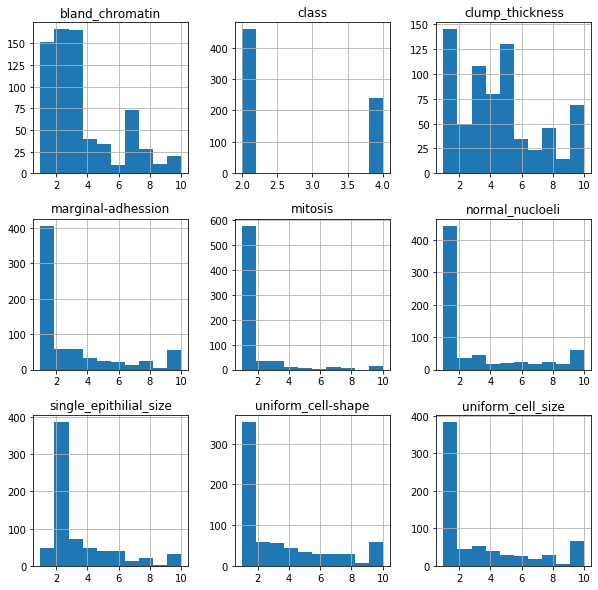

In [8]:
df.hist(figsize = (10,10))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

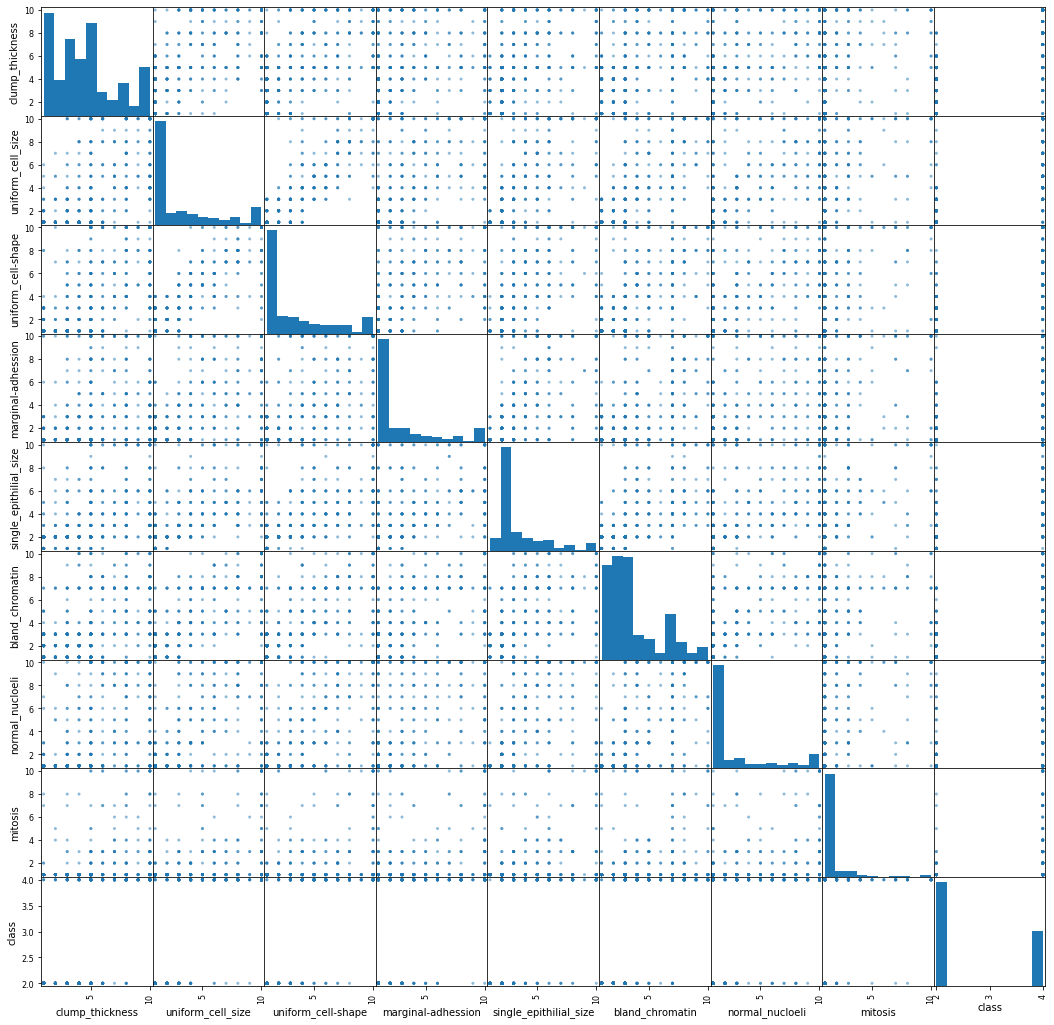

In [9]:
scatter_matrix(df, figsize = (18,18))
plt.show

In [10]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=100)

Specifying the variables

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

defining models to train

Training via KNN and SVM

In [13]:
models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))
models.append(("SVM", SVC()))
models.append(("XGBoost", XGBClassifier()))

results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(random_state = 100,n_splits = 10)
    cv_results = model_selection.cross_val_score(model, X_train , y_train, scoring = 'accuracy', cv = kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.964221 (0.013833)
SVM: 0.966006 (0.009630)
XGBoost: 0.980292 (0.014905)


making predictions

In [15]:
for name, model in models:
    model.fit(X_train, y_train)
    train_predict = model.predict(X_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_train,train_predict))
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
     

KNN
0.9731663685152058
0.9214285714285714
              precision    recall  f1-score   support

           2       0.93      0.94      0.93        83
           4       0.91      0.89      0.90        57

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140

SVM
0.9785330948121646
0.9285714285714286
              precision    recall  f1-score   support

           2       0.94      0.94      0.94        83
           4       0.91      0.91      0.91        57

    accuracy                           0.93       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.93      0.93      0.93       140

XGBoost
1.0
0.8571428571428571
              precision    recall  f1-score   support

           2       0.82      0.96      0.89        83
           4       0.93      0.70      0.80        57

    accuracy                           0.86       140
   macro avg 

In [16]:
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9285714285714286
